# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print (df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [25]:
print("Answer:" ,len(df_raw.index))

Answer: 400


#### Question 2. Create a summary table

In [13]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Standard deviation is a measure of distibution from the mean. The range is between the min and max, the observed range of values for gpa is 2.26 to 4, whilst for GRE it's 220 to 800.  And the mean is 3.39 and 588, respectively. Therefore we can assume that the standard deviation for GRE will always be larger in order to explain the larger variance from the mean.


#### Question 4. Drop data points with missing data


In [3]:
print("without nulls",len(df_raw.dropna())) 
df_nonulls = df_raw.dropna()

without nulls 397


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer:

In [13]:
print("Total number of nulls in the df:", df_raw.isnull().sum().sum())
print()
#You can compare a len() function which includes nulls to a count() function which excludes nulls
print("Total rows:", len(df_raw.index)) # len includes nulls 
print()
print('Orginal',df_raw.count()) 
print() 
print('no nulls', df_nonulls.count()) # no nulls df 
print()
#You could also check that no nulls exist in your new data frame, confirmed by False:    
print("Any nulls:",df_nonulls.isnull().values.any())

Total number of nulls in the df: 5

Total rows: 400

Orginal admit       400
gre         398
gpa         398
prestige    399
dtype: int64

no nulls admit       397
gre         397
gpa         397
prestige    397
dtype: int64

Any nulls: False


#### Question 6. Create box plots for GRE and GPA

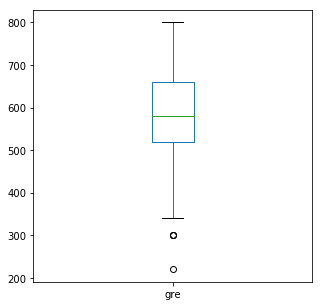

In [27]:
#boxplot 1
#df_nonulls[['gre']].boxplot()
#or 
df_nonulls['gre'].plot(kind="box", figsize=(5,5))

## Q: you suggested this to show the values for outliers but I can't get it to work, perhaps because I'm using Python 3?
#print (bp['fliers'][0].get_xydata()) 


upper whisker: 4.48


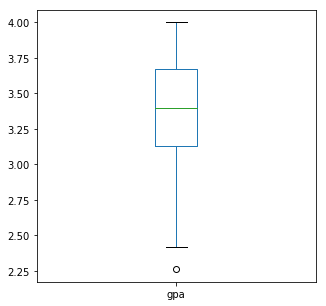

In [39]:
#boxplot 2 
df_nonulls['gpa'].plot(kind="box", figsize=(5,5)) 

Q1 = df_nonulls['gpa'].quantile(.25)
Q3 = df_nonulls['gpa'].quantile(.75)
print('upper whisker:', Q3+((Q3-Q1)*1.5))


#### Question 7. What do this plots show?

Answer: 
They show the quantile distribution of values.  GRE boxplot identifies 2 outliers, and 1 for GPA. Does it suggests that GRE is slightly skewed as the median is not evenly between the 25% and 75% quartiles? GRE looks more normal.

My calc for upper whisker above = 4.48, The plot shows a figure closer to 4. What I was struggling to interpret is, if the median sits evenly between Q1 and Q3, then I would expect the whiskers to also be symmetrical? Have I got the calculation wrong?


#### Question 8. Describe each distribution 

Gre and gpa are normally distributed, both are slightly negatively skewed, -0.14 and -0.21 respectively. 
Prestige is symmetrical, with a very low skew value of 0.08, the variable is categorical variable so shows some odd troughs.
Would you use a density plot for a categorical variable? Should I create dummy variables?


prestige
Mean: 2.4886649874055418
Skew: 0.0865055528971
Kurtosis aka peakedness (Values closer to 0 suggest normal dist): -0.90103795489


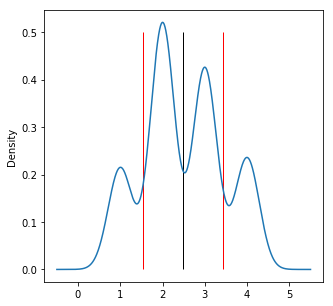

In [47]:
# plot the distribution of each variable 

#**********************
set_variable = 'prestige' ## gre, gpa, prestige, admit
#**********************
print(set_variable)
print("Mean:", df_nonulls[set_variable].mean())
print ("Skew:", df_nonulls[set_variable].skew())
print ("Kurtosis aka peakedness (Values closer to 0 suggest normal dist):", df_nonulls[set_variable].kurt())

#calculating max y value 
q1 = df_nonulls[set_variable].quantile(.25)
q2 = df_nonulls[set_variable].quantile(.5) 
# Couldn't figure out how is the y value calculated on a density plot?!
# maxy = df_nonulls[(df_nonulls[set_variable]>=q1) & (df_nonulls[set_variable]<=q2)][set_variable].count()/df_nonulls[set_variable].count()

maxY = 0.5

df_nonulls[set_variable].plot(kind="density", figsize=(5,5))
    
plt.vlines(df_nonulls[set_variable].mean(),     # Plot black line at mean
              ymin=0, 
              ymax=maxY,
              linewidth=1.0)

greSTD = df_nonulls[set_variable].std()
plt.vlines(df_nonulls[set_variable].mean()+greSTD,     # Plot red line at +1 std dev
            ymin=0, 
            ymax=maxY,
            linewidth=1.0, 
            color = "red")

plt.vlines(df_nonulls[set_variable].mean()-greSTD,     # Plot red line at -1 std dev
           ymin=0, 
           ymax=maxY,
           linewidth=1.0, 
           color = "red")

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Yes

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Prestige is a categorical variable so we could create dummy variables to convert it to continuous.

#### Question 11. Which of our variables are potentially colinear? 

             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000


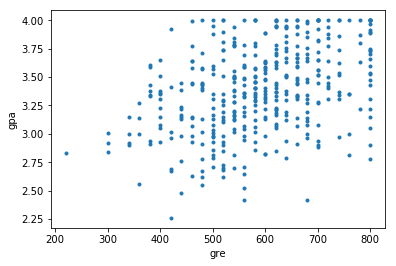

In [50]:
# create a correlation matrix for the data
print(df_nonulls.corr())

plt.figure()
plt.plot(df_nonulls.gre, df_nonulls.gpa, '.')
plt.xlabel('gre')
plt.ylabel('gpa')
plt.show()

#### Question 12. What did you find?

Answer: 

There isn't a strong correlation between any of the variables.
gpa and gpe have the strongest correlation, at 0.38, which suggests a moderate positive correlation.
Prestige and Admit has a negative correlaton of -0.24.
Little correlation exists between gre and prestige (-0.12), and gpa and prestige (-0.06)

gre and gpa seem to be capped at 800 and 4.


#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

- Extract the data from the source ..., using the following parameters ...
- Count the total number of observations - is your sample large enough to answer the problem statement?
- Analyse data for missing values - too many missing values might compromise the analysis.
- Calculate the summary & descriptive statistics; mean, quartiles and standard deviation for each predictor to understand the shape, are there outliers? Is the data normally distributed? 
- Create histograms and box plots for each predictor to help answer the above.
- Can you make sense of the shape of the data, can you make sense of the outliers? Does the outlier range need to be adjusted?
- Check for colinearity between predictors 
- Calculate the correlation between the outcome variable and predictors.
- Review and remove predictors that are strongly correlated.
        

#### Question 14. What is your hypothesis? 

Answer: gpe, gra and prestige are correlated with university admissions.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

-0.146046988216
-0.76062969651


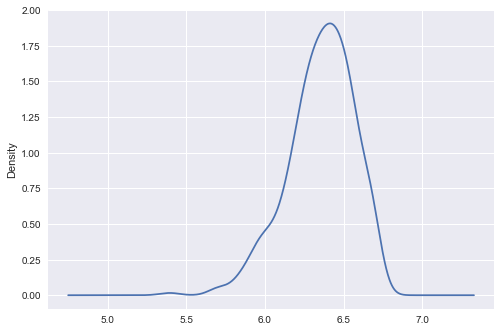

In [62]:
# In my opinion the data isn't that skewed,  so I'm finding it hard to find a log that will correct the skew...


log_admit = df_nonulls.copy()
log_admit['gre'] = log_admit['gre'].apply(np.log) 
#df_nonulls[ 'gre'].plot(kind ="density") 
log_admit[ 'gre'].plot(kind ="density") 
print(df_nonulls[ 'gre'].skew())
print(log_admit['gre'].skew()) 



#### 3. Advanced: Impute missing data